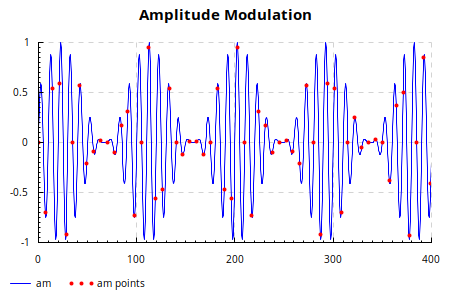

In [7]:
import Graphics.Rendering.Chart
import Data.Colour
import Data.Colour.Names
import Data.Default.Class
import Graphics.Rendering.Chart.Backend.Cairo
import Control.Lens

setLinesBlue :: PlotLines a b -> PlotLines a b
setLinesBlue = plot_lines_style  . line_color .~ opaque blue

chart = toRenderable layout
  where
    am :: Double -> Double
    am x = (sin (x*3.14159/45) + 1) / 2 * (sin (x*3.14159/5))

    sinusoid1 = plot_lines_values .~ [[ (x,(am x)) | x <- [0,(0.5)..400]]]
              $ plot_lines_style  . line_color .~ opaque blue
              $ plot_lines_title .~ "am"
              $ def

    sinusoid2 = plot_points_style .~ filledCircles 2 (opaque red)
              $ plot_points_values .~ [ (x,(am x)) | x <- [0,7..400]]
              $ plot_points_title .~ "am points"
              $ def

    layout = layout_title .~ "Amplitude Modulation"
           $ layout_plots .~ [toPlot sinusoid1,
                              toPlot sinusoid2]
           $ def
chart